#CP02. Histograma, Operadores aritméticos y lógicos

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab.patches import cv2_imshow

drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


---

# Bloque I: Histograma

---

- Aprenderemos a obtener histogramas de imágenes y a aplicar técnicas de ecualizado, normalización y amplitud del rango

---


##**Ejemplo I.1**: histograma de una imagen

- Mostrar el histograma de la imagen eq_gris1.jpg utilizando *cv2.calcHist*

**Comentarios**:

Parámetros de la función *cv2.calcHist*:
  
  * img     = imagen en niveles de gris
  * [0]     = un canal
  * None    = no usamos ninguna máscara
  * [256]   = número de elementos en el histograma
  * [0,255] = valores posibles

---

Imagen original:


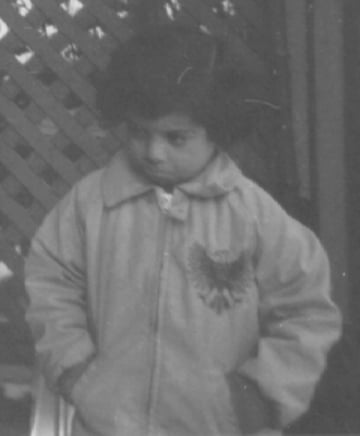

Histograma de la imagen original:


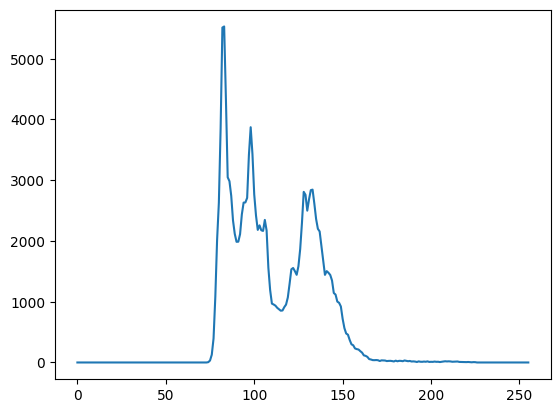

el valor del histograma para el nivel de gris  50 es: [0.]
el valor del histograma para el nivel de gris 100 es: [2767.]
el valor del histograma para el nivel de gris 150 es: [719.]
el valor del histograma para el nivel de gris 200 es: [11.]
el valor del histograma para el nivel de gris 250 es: [0.]


In [ ]:
# Construimos el path de la imagen que vamos a leer del drive
path = "/content/drive/MyDrive/fuck/"
nombre_imagen = 'eq_gris1.jpg'
path += nombre_imagen

# Leemos y mostramos la imagen
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
print("Imagen original:")
cv2_imshow(img)

# Calculamos la frecuencia de píxeles en el rango 0..255
histograma = cv2.calcHist([img],[0],None,[256],[0,256]) #(imgarray, channels, mask, histSize, range)

# Mostramos el histograma en un plot
plt.plot(histograma)
print("Histograma de la imagen original:")
plt.show()

# Mostramos algunos valores del histograma
print(f'el valor del histograma para el nivel de gris  50 es: {histograma[50]}')
print(f'el valor del histograma para el nivel de gris 100 es: {histograma[100]}')
print(f'el valor del histograma para el nivel de gris 150 es: {histograma[150]}')
print(f'el valor del histograma para el nivel de gris 200 es: {histograma[200]}')
print(f'el valor del histograma para el nivel de gris 250 es: {histograma[250]}')


---

- Otra forma de mostrar el histograma de una imagen es empleando la función ravel de Numpy:

---


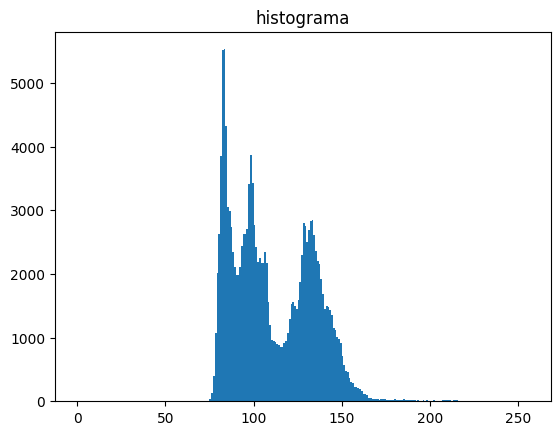

In [ ]:
plt.subplot(111), plt.title("histograma")
plt.hist(img.ravel(), 256, [0, 256])
plt.show()


---

##**Ejemplo I.2**: histograma de una imagen en color

- Calcular el histograma de cada uno de los 3 planos de color de una imagen en color y mostrarlos en un mismo plot

---

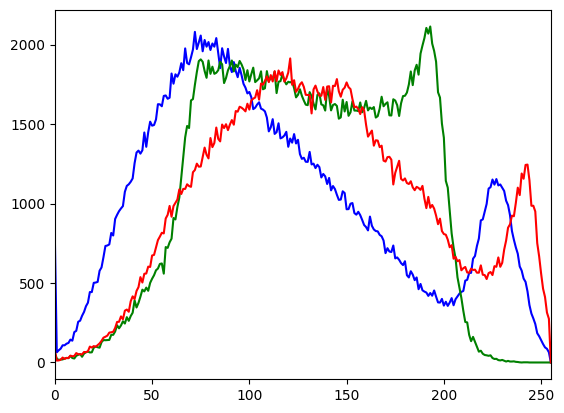

In [ ]:
# Construimos el path de la imagen que vamos a leer del drive
path = "/content/drive/MyDrive/fuck/"
nombre_imagen = 'baboon.jpg'
path += nombre_imagen

# Leemos la imagen
img = cv2.imread(path, cv2.IMREAD_COLOR)

color = ("b", "g", "r")

for i, col in enumerate(color):
	histograma = cv2.calcHist([img], [i], None, [256], [0, 255]) # Ch1=B Ch2=G Ch3=R
	plt.plot(histograma, color = col)
	plt.xlim([0, 255])

plt.show()


---

##**Ejemplo I.3**: Amplitud del rango de los niveles de intensidad de una imagen

- Adaptamos el rango de valores de un plano de color (en este ejemplo el único que hay ya que se trata de una imagen monocromática)

- La amplitud de escala se calcula mediante:

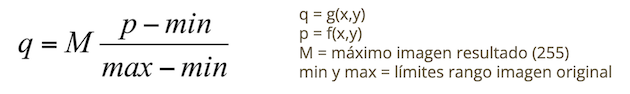

---


Valores [Mínimo , Máximo] antes de ampliar el rango: [7 , 69]


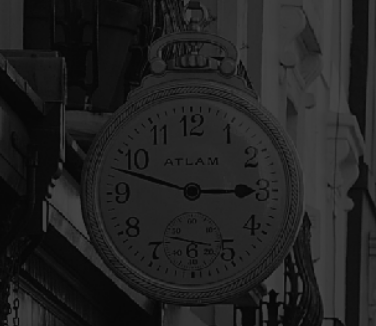

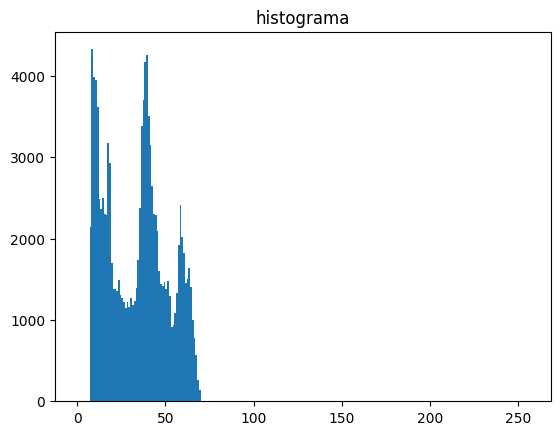

Valores [Mínimo , Máximo] después de ampliar el rango: [0.0 , 255.0]


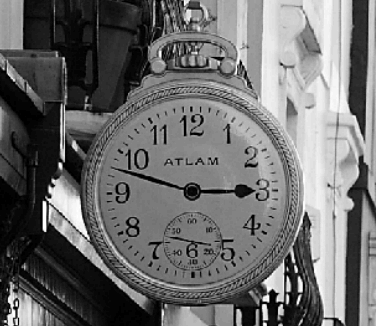

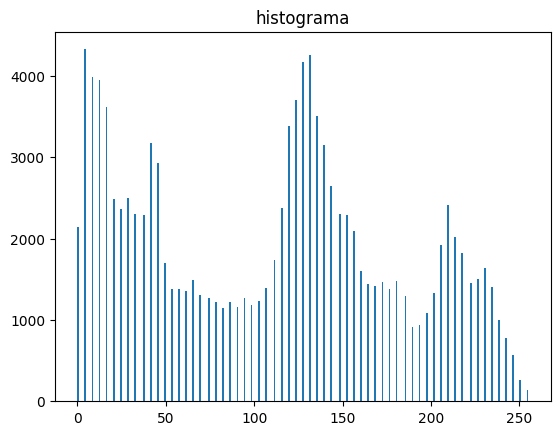

In [ ]:
# Construimos el path de la imagen que vamos a leer del drive
path = "/content/drive/MyDrive/fuck/"
nombre_imagen = 'reloj.png'
path += nombre_imagen

# Leemos la imagen
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

# Obtenemos los valores mínimo y máximo
minimo = img.min()
maximo = img.max()
print(f'Valores [Mínimo , Máximo] antes de ampliar el rango: [{minimo} , {maximo}]')

# Mostramos la imagen y su histograma
cv2_imshow(img)
plt.subplot(111), plt.title("histograma")
plt.hist(img.ravel(), 256, [0, 256])
plt.show()

# Ampliamos el rango de los valores de los píxeles (píxel a píxel)
# for x in range(0,alto):  # filas
# 	for y in range(0,ancho):  # columnas
# 		img[x, y] = 255 * ((img[x,y] - minimo) / (maximo - minimo))

# Ampliamos el rango de los valores de los píxeles (más eficiente)
img = (255 * ((img - minimo) / (maximo - minimo)))

# Obtenemos los nuevos valores mínimo y máximo
minimo = img.min()
maximo = img.max()
print(f'Valores [Mínimo , Máximo] después de ampliar el rango: [{minimo} , {maximo}]')

# Mostramos la imagen después de ampliar el rango
cv2_imshow(img)
plt.subplot(111), plt.title("histograma")
plt.hist(img.ravel(), 256, [0, 256])
plt.show()


---

##**Ejemplo I.4**: Normalización de los niveles de intensidad de una imagen

- La normalización se calcula mediante la siguiente expresión:

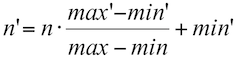

- También podemos utilizar la función *normalize()* de OpenCV

---


Valores [Mínimo , Máximo] antes de normalizar: [7 , 69]


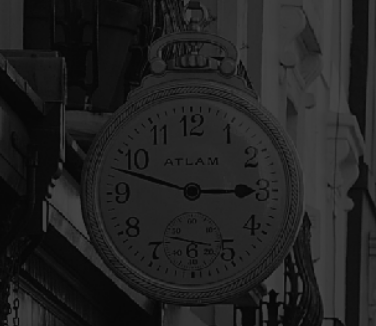

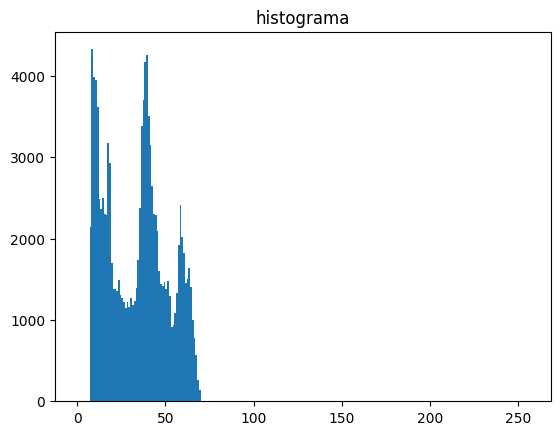

Valores [Mínimo , Máximo] después de normalizar: [28.790322580645164 , 283.7903225806452]


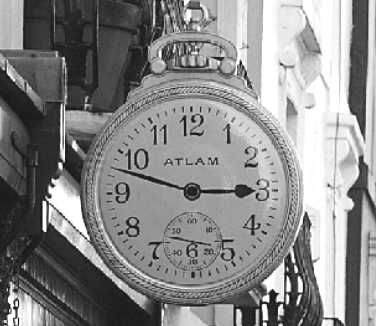

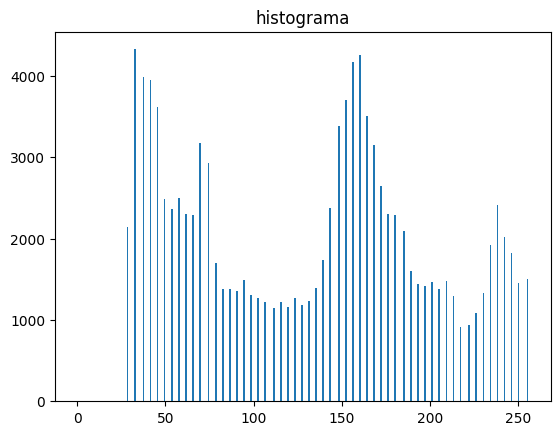

Valores [Mínimo , Máximo] después de normalizar con la función normalize: [0 , 255]


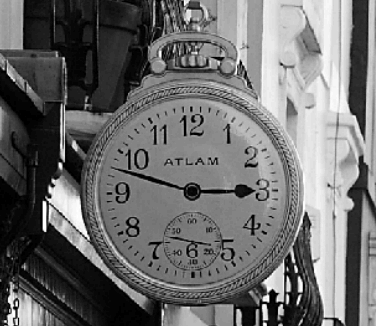

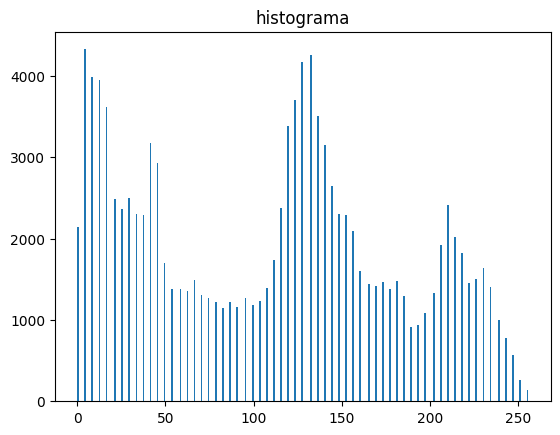

In [ ]:
# Construimos el path de la imagen que vamos a leer del drive
path = "/content/drive/MyDrive/fuck/"
nombre_imagen = 'reloj.png'
path += nombre_imagen

# Leemos la imagen
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

# Obtenemos los valores mínimo y máximo
minimo = img.min()
maximo = img.max()
print(f'Valores [Mínimo , Máximo] antes de normalizar: [{minimo} , {maximo}]')

# Mostramos la imagen y su histograma
cv2_imshow(img)
plt.subplot(111), plt.title("histograma")
plt.hist(img.ravel(), 256, [0, 256])
plt.show()

# NORMALIZACION MANUAL
# Normalizamos la imagen empleando la expresión indicada
img_norm = img * (255 / (maximo - minimo))

# Obtenemos los valores mínimo y máximo después de normalizar
minimo = img_norm.min()
maximo = img_norm.max()
print(f'Valores [Mínimo , Máximo] después de normalizar: [{minimo} , {maximo}]')

# Mostramos la imagen normalizada y su histograma
cv2_imshow(img_norm)
plt.subplot(111), plt.title("histograma")
plt.hist(img_norm.ravel(), 256, [0, 256])
plt.show()

# NORMALIZACION CON FUNCION
# Normalizamos la imagen empleando la función normalize()
img_normalizada = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Obtenemos los valores mínimo y máximo después de normalizar con la función
minimo = img_normalizada.min()
maximo = img_normalizada.max()
print(f'Valores [Mínimo , Máximo] después de normalizar con la función normalize: [{minimo} , {maximo}]')

# Mostramos la imagen normalizada con la función y su histograma
cv2_imshow(img_normalizada)
plt.subplot(111), plt.title("histograma")
plt.hist(img_normalizada.ravel(), 256, [0, 256])
plt.show()


---

# **EJERCICIO 1**: Amplitud el rango de los niveles de intensidad de una imagen en color

**Enunciado**:

Leer la imagen "lena.bmp", obtener sus 3 planos de color con la función *cv2.split*, ampliar el rango de niveles de intensidad de cada uno de ellos y volver a mezclar en una única imagen con la función *cv2.merge*

**Comentarios**:

Al hacer operaciones con los valores de los píxeles de una imagen es posible que haya conversión implícita de tipos, si es el caso podemos utilizar una función de conversión de numpy: *astype(np.uint8)* para convertir al tipo adecuado uint8

---


In [2]:
def showMultipleColorPlot(title, image) -> int:
  color = ("b", "g", "r")
  plt.title(title)
  for i, col in enumerate(color):
    histograma = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histograma, color = col)
    plt.xlim([0, 255])
  plt.show()

def amplitudDeRango(image):
  minimo = image.min()
  maximo = image.max()
  amplit = 255 * ((image - minimo) / (maximo - minimo))
  return amplit.astype(np.uint8)

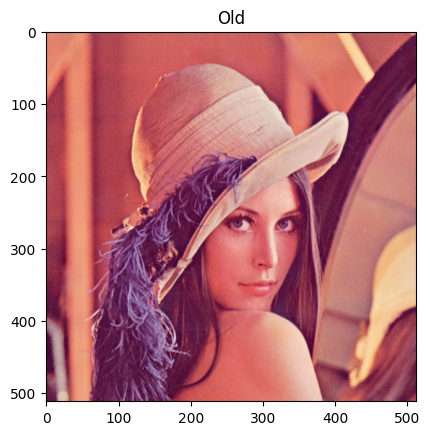

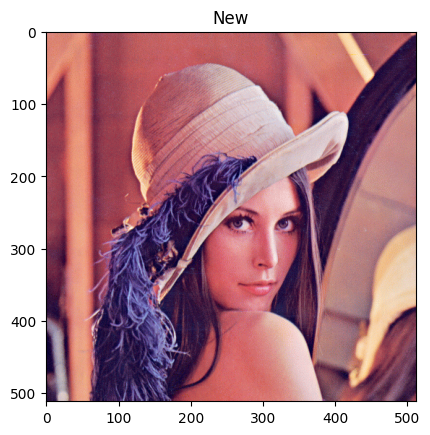

In [ ]:
path = "/content/drive/MyDrive/fuck/"
nimg = 'lena.bmp'
path += nimg


img = cv2.imread(path, cv2.IMREAD_COLOR)

# showMultipleColorPlot("Pre", img)

B, G, R = cv2.split(img)

B = amplitudDeRango(B)
G = amplitudDeRango(G)
R = amplitudDeRango(R)

B = B.astype(np.uint8)
G = G.astype(np.uint8)
R = R.astype(np.uint8)

img_new = cv2.merge([B, G, R])

# showMultipleColorPlot("Post", img)

plt.subplot(111), plt.title("Old")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
plt.subplot(111), plt.title("New")
plt.imshow(cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB))
plt.show()



---

##**Ejemplo I.5**: Ecualización del Histograma

- Realizamos una ecualización del histograma empleando la función cv2.equalizeHist que, dada una imagen como parámetro de entrada, devuelve una imagen que es el resultado de aplicar el ecualizado del histograma a la imagen pasada por parámetro

---

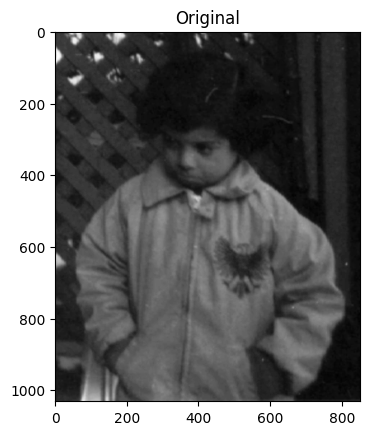

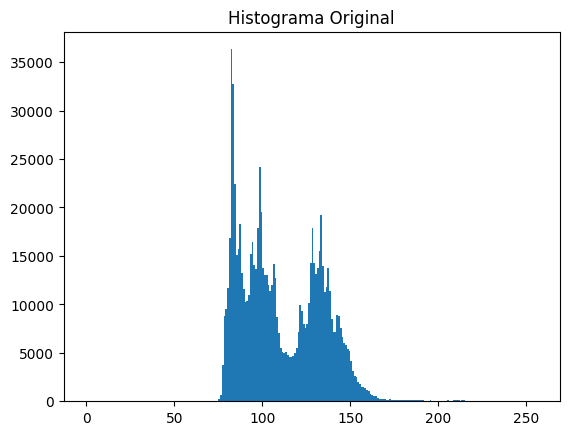

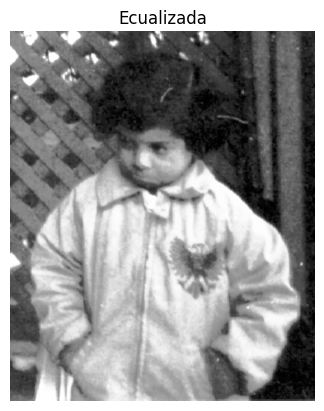

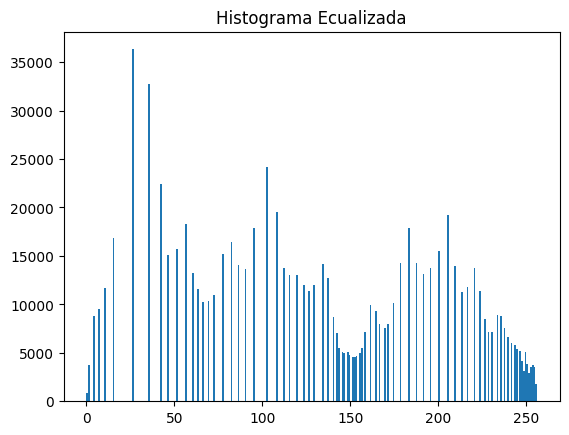

In [ ]:
# Construimos el path de la imagen que vamos a leer del drive
path = "/content/drive/MyDrive/fuck/"
nombre_imagen = 'nina.jpg'
path += nombre_imagen

# Leemos la imagen
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

# Ecualizamos la imagen
equ = cv2.equalizeHist(img)

# Calculamos los histogramas de la imagen original y de la imagen ecualizada
histo_img = cv2.calcHist(img, [0], None, [256], [0, 255])
histo_equ = cv2.calcHist(equ, [0], None, [256], [0, 255])

# Mostramos la imagen original y su histograma
plt.subplot(111), plt.title("Original"), plt.axis("on")
plt.imshow(img, cmap = 'gray')
plt.show()
plt.subplot(111), plt.title("Histograma Original")
plt.hist(img.ravel(), 256, [0, 256])
plt.show()

# Mostramos la imagen ecualizada y su histograma
plt.subplot(111), plt.title("Ecualizada"), plt.axis("off")
plt.imshow(equ, cmap = 'gray')
plt.show()
plt.subplot(111), plt.title("Histograma Ecualizada")
plt.hist(equ.ravel(), 256, [0, 256])
plt.show()


---

##**Ejemplo I.6**: Ecualización adaptativa del Histograma

Empleamos la función *cv2.createCLAHE* (CLAHE = Contrast Limited Adaptive Histogram Equalization) donde:

- *clipLimit*: el umbral para limitar el contraste
    
- *tileGridSize*: tamaño de las regiones

La ecualización de histograma adaptativa limitada por contraste (CLAHE) es una variante de la ecualización de histograma que permite mejorar el contraste de la imagen y al mismo tiempo evitar la sobreamplificación del ruido y preservar los detalles de la imagen.

La idea principal detrás de CLAHE es realizar la ecualización de histograma localmente, en regiones más pequeñas de la imagen, en lugar de globalmente.

CLAHE implica dos pasos principales: mejorar el contraste y limitar el contraste. En el primer paso, se aplica una ecualización de histograma local a cada pequeña región de la imagen, lo que da como resultado un mayor contraste. En el segundo paso, se limita el contraste de la imagen aplicando una función no lineal al histograma, de modo que se reduce el número de píxeles con intensidades muy altas o muy bajas. La función no lineal se define mediante un parámetro llamado límite de recorte (*clipLimit*), que determina la cantidad de limitación de contraste que se aplicará.

El límite de recorte es un parámetro importante en CLAHE. Determina la cantidad máxima de amplificación de contraste que se puede realizar en cada región antes de que se limite el contraste. Si el límite de recorte se establece demasiado alto, la imagen puede mejorarse demasiado y sufrir efectos de apariencia artificial, como halos alrededor de los bordes. Por otro lado, si el límite de clip se establece demasiado bajo, la mejora del contraste puede no ser suficiente y la imagen puede parecer opaca.

---


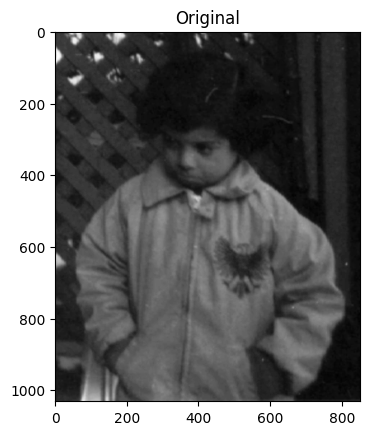

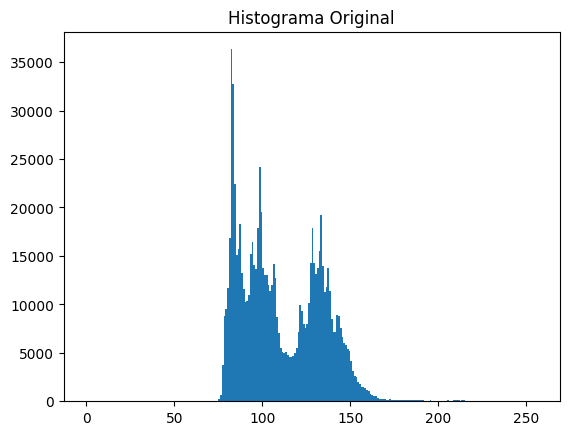

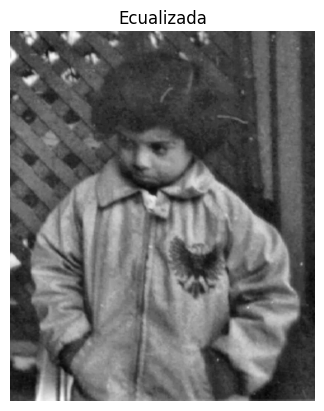

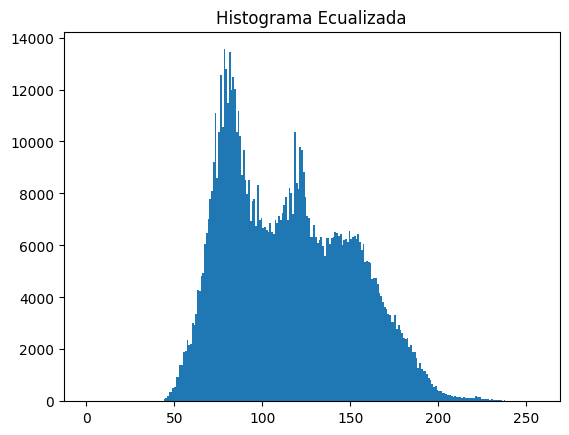

In [ ]:
# Construimos el path de la imagen que vamos a leer del drive
path = "/content/drive/MyDrive/fuck/"
nombre_imagen = 'nina.jpg'
path += nombre_imagen

# Leemos la imagen
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

# Aplicamos la ecualización adaptativa del histograma
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(9, 9))
equ_adaptativo = clahe.apply(img)

# Mostramos la imagen original y su histograma
plt.subplot(111), plt.title("Original"), plt.axis("on")
plt.imshow(img, cmap = 'gray')
plt.show()
plt.subplot(111), plt.title("Histograma Original")
plt.hist(img.ravel(), 256, [0, 256])
plt.show()

# Mostramos la imagen ecualizada y su histograma
plt.subplot(111), plt.title("Ecualizada"), plt.axis("off")
plt.imshow(equ_adaptativo, cmap = 'gray')
plt.show()
plt.subplot(111), plt.title("Histograma Ecualizada")
plt.hist(equ_adaptativo.ravel(), 256, [0, 256])
plt.show()


---

##**Ejemplo I.7**: Ecualización de la intensidad lumínica en una imagen en color

- Convertimos la imagen RGB al modelo HSV (tono, saturación e intensidad)

- Obtenemos los distintos planos con la función cv2.split

- Aplicamos la ecualización al plano de intensidad (V)

- Volvemos a componer la imagen HSV con el plano de intensidad ecualizado

---


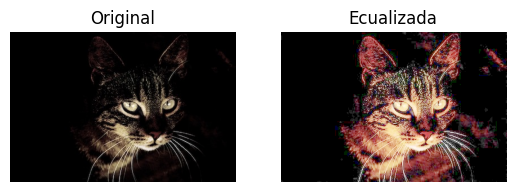

In [9]:
# Construimos el path de la imagen que vamos a leer del drive
path = "/content/drive/MyDrive/fuck/"
nombre_imagen = 'gato.jpg'
path += nombre_imagen

# Leemos la imagen y la convertimos a HSV
imgBGR = cv2.imread(path, cv2.IMREAD_COLOR)
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
imgHSV = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2HSV)

# Separamos los planos de la imagen en HSV
H, S, V = cv2.split(imgHSV)

# Ecualizamos el plano de intensidad V
eq_V = cv2.equalizeHist(V)

# Volvemos a combinar los planos en una única imagen en RGB
eq_image = cv2.cvtColor(cv2.merge([H, S, eq_V]), cv2.COLOR_HSV2RGB)

# Mostramos la imagen original y la ecualizada
plt.subplot(121), plt.title("Original"), plt.axis("off")
plt.imshow(imgRGB)

plt.subplot(122), plt.title("Ecualizada"), plt.axis("off")
plt.imshow(eq_image)

plt.show()

---

#**EJERCICIO 2**: Ecualizado de imágenes

**Enunciado**:

- Ecualizar las siguientes imágenes: bosque.jpeg , soledad.jpeg y esperando.jpeg

**Comentarios**:

Considerar el método más adecuado en función del tipo de imagen y en las que son en color probar a hacerlo tanto en RGB como en HSV (y para uno o varios planos)

---

In [15]:
def eqIntensidadLuminicaH(image):
  imgHSV = HSVSep(image)
  H, S, V = cv2.split(imgHSV)
  equalized = cv2.equalizeHist(H)
  eqimg = cv2.cvtColor(cv2.merge([equalized, S, V]), cv2.COLOR_HSV2RGB)
  plotit(eqimg, "H", 131)

def eqIntensidadLuminicaS(image):
  imgHSV = HSVSep(image)
  H, S, V = cv2.split(imgHSV)
  equalized = cv2.equalizeHist(S)
  eqimg = cv2.cvtColor(cv2.merge([H, equalized, V]), cv2.COLOR_HSV2RGB)
  plotit(eqimg, "S", 132)
def eqIntensidadLuminicaV(image):
  imgHSV = HSVSep(image)
  H, S, V = cv2.split(imgHSV)
  equalized = cv2.equalizeHist(V)
  eqimg = cv2.cvtColor(cv2.merge([H, S, equalized]), cv2.COLOR_HSV2RGB)
  plotit(eqimg, "V", 133)
  plt.show()
def plotit(image, eqvar, pl):
  plt.subplot(pl), plt.title(f"Ecualizada en {eqvar}"), plt.axis("off")
  plt.imshow(image)

def HSVSep(image):
  imgBGR = cv2.imread(image, cv2.IMREAD_COLOR)
  imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
  imgHSV = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2HSV)
  return imgHSV

In [7]:
def eqAdaptativa(image):
  img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(9, 9))
  equ_adaptativo = clahe.apply(img)
  plotitadapt(equ_adaptativo)

def plotitadapt(image):
  plt.subplot(111), plt.title("Ecualizada"), plt.axis("off")
  plt.imshow(image, cmap = 'gray')
  plt.show()

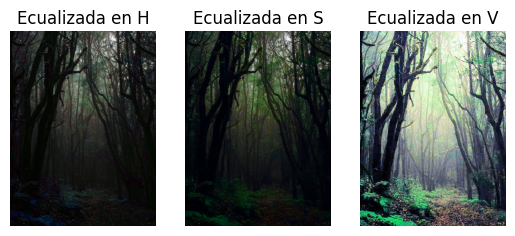

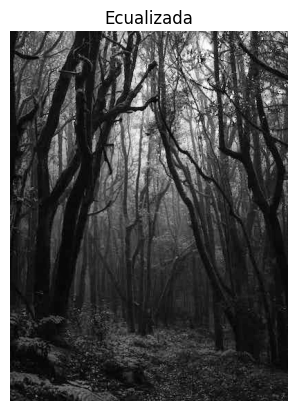

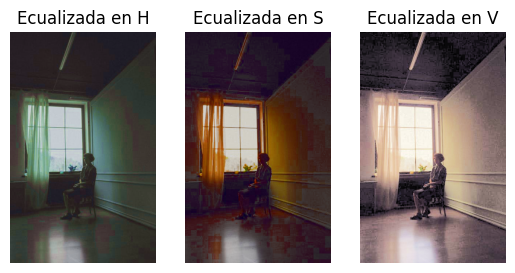

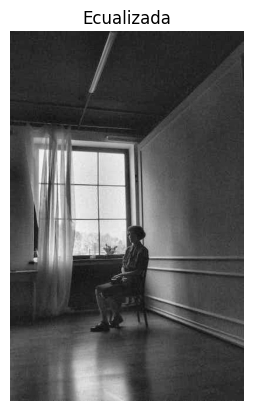

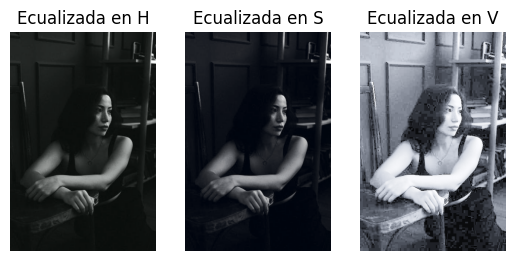

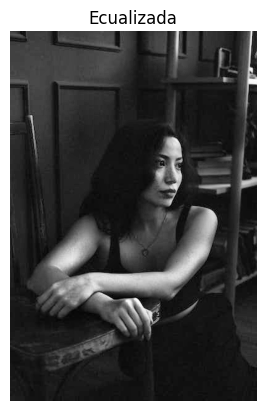

In [16]:
bosque = '/content/drive/MyDrive/fuck/bosque.jpeg'
soledad = '/content/drive/MyDrive/fuck/soledad.jpeg'
esperando = '/content/drive/MyDrive/fuck/esperando.jpeg'

imagenes = (bosque, soledad, esperando)
for i, img in enumerate(imagenes):
  eqIntensidadLuminicaH(img)
  eqIntensidadLuminicaS(img)
  eqIntensidadLuminicaV(img)
  eqAdaptativa(img)



---

# Bloque II: Operadores aritméticos

- Aprenderemos a utilizar operadores aritméticos aplicados a imágenes digitales (suma de imágenes, suma ponderada de imágenes, resta de imágenes y escalado)


---

**Función** ***add***

Sintaxis: cv2.add(img1, img2)

Parámetros de entrada:
- img1: primera imagen de entrada
- img2: segunda imagen de entrada

Valor de retorno:
- devuelve la imagen resultado de aplicar la suma de las dos imágenes de entrada

**Nota1**: ambas imágenes deben tener el mismo tamaño, número de canales y tipo de datos

**Nota2**: esta operación no tiene mucho sentido aplicada a dos imágenes diferentes a no ser que sea para calcular la media de la suma de los frames de una secuencia de imágenes de una misma escena sin movimiento (en cuyo caso puede servir para reducir el posible ruido ocurrido en la captura)

---

##**Ejemplo II.1**: suma de imágenes

- Abrimos las imágenes baboon.jpg y lena.bmp y las sumamos comprobando que no tiene mucho sentido realizar esta operación entre imágenes diferentes y comprobando que las funciones add de OpenCV y Numpy se comportan de manera diferente

---




In [5]:
path = "/content/drive/MyDrive/fuck/"
nombre_imagen = 'baboon.jpg'
path += nombre_imagen

imgBGRbaboon = cv2.imread(path, cv2.IMREAD_COLOR)
cv2_imshow(imgBGRbaboon)
print()

path = "/content/drive/MyDrive/fuck/"
nombre_imagen = 'lena.bmp'
path += nombre_imagen

imgBGRlena = cv2.imread(path, cv2.IMREAD_COLOR)
cv2_imshow(imgBGRlena)
print()

suma = cv2.add(imgBGRbaboon, imgBGRlena)
print("Resultado de la suma con la función add de OpenCV:")
cv2_imshow(suma)

suma = np.add(imgBGRbaboon, imgBGRlena)
print("Resultado de la suma con la función add de Numpy:")
cv2_imshow(suma)


Output hidden; open in https://colab.research.google.com to view.

---

##**Ejemplo II.2**: suma OpenCV vs suma Numpy

---


In [ ]:
import cv2
import numpy as np

a = np.arange(9, dtype=np.uint8).reshape(3,3)
print(f'imagen a:\n {a} \n')

b = np.full((3,3), 250, np.uint8)
print(f'imagen b:\n {b} \n')

print(f'resultado de la suma en OpenCV:\n {cv2.add(a,b)}')
print(f'resultado de la suma en Numpy:\n {np.add(a,b)}')
print(f'resultado de la suma a+b:\n {a+b}')


---

La razón por lo que ocurre esto es que la función cv2.imread() devuelve un numpy array con unsigned int de 8 bits como tipo de datos.

Por lo tanto, cuando queremos almacenar un valor entero de -1 en este tipo de datos, dicho valor se almacena como 255.

**Importante**: si queremos realizar operaciones que "saturen" el rango del tipo empleado en las imágenes debemos hacer un casting para trabajar con tipos de datos con mayor rango y posteriormente normalizar para adaptar los resultados al rango de almacenamiento y/o visualización.

---


In [ ]:
a = np.array([1, 2, 3, 4], dtype=np.uint8)
a[0] = -1
a[3] = 200
print(f'entero sin signo 8 bits:\n{a}\n')

a = a.astype(np.int8)
a[0] = -1
a[3] = 200
print(f'entero con signo 8 bits:\n{a}\n')

a = a.astype(np.int32)
a[0] = -1
a[3] = 200
print(f'entero:\n{a}\n')

a = a.astype(np.float64)
a[0] = -1
a[3] = 200
print(f'real en coma flotante:\n{a}\n')


---

**Normalizar después de aplicar la suma**: En el ejemplo I.4 de este mismo cuaderno hemos visto como normalizar el rango de niveles de una imagen, aquí vamos a utilizar la función normalize de las OpenCV.

**Nota**: observar que al mostrar la imagen sin normalizar con la función cv2_imshow se pierde parte del degradado de la imagen ya que a partir de la mitad de la imagen los píxeles mayores de 255 se saturan y toman el valor máximo (255).

---


In [ ]:
import cv2
import numpy as np

img = np.arange(512, dtype=np.int32).reshape(32,16)
print(f'imagen:\n{img}\n')

cv2_imshow(img)

img_normalizada = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
print(f'imagen normalizada:\n{img_normalizada}\n')

cv2_imshow(img_normalizada)


---

##**Ejemplo II.3**: suma ponderada

---

**Función** ***addWeighted***

Sintaxis: cv2.addWeighted(img1, a, img2, b, gamma)

Parámetros de entrada:
- img1: primera imagen de entrada
- a: peso de los píxeles de la primera imagen de entrada
- img2: segunda imagen de entrada
- b: peso de los píxeles de la segunda imagen de entrada
- gamma: incremento (valor positivo) o decremento (valor negativo) de la luminosidad

Valor de retorno:
- devuelve la imagen resultado de aplicar la suma ponderada correspondiente de las dos imágnes de entrada mediante la siguiente expresión:

  `res = a·img1 + b·img2 + gamma`

**Nota1**: ambas imágenes deben tener el mismo tamaño, número de canales y tipo de datos

**Nota2**: para hacer un efecto de blending (mezcla) entre dos imágenes el valor de a debe estar comprendido entre 0 y 1, y el valor de b debe ser 1 - a

---


In [ ]:
path = "/content/drive/MyDrive/Curso_24_25/imas/"
nombre_imagen = 'baboon.jpg'
path += nombre_imagen

imgBGRbaboon = cv2.imread(path, cv2.IMREAD_COLOR)
cv2_imshow(imgBGRbaboon)
print()

path = "/content/drive/MyDrive/Curso_24_25/imas/"
nombre_imagen = 'lena.bmp'
path += nombre_imagen

imgBGRlena = cv2.imread(path, cv2.IMREAD_COLOR)
cv2_imshow(imgBGRlena)
print()

sumaPonderada = cv2.addWeighted(imgBGRbaboon, 0.4, imgBGRlena, 0.6, 30)
cv2_imshow(sumaPonderada)
print()


---

##**Ejemplo II.4**: resta y resta en valor absoluto

**Función** ***subtract***

Sintaxis: cv2.subtract(img1, img2)

Parámetros de entrada:
- img1: primera imagen de entrada
- img2: segunda imagen de entrada

Valor de retorno:
- devuelve la imagen resultado de aplicar la resta de los píxeles de la segunda imagen de entrada a los píxeles de la primera imagen de entrada

**Nota1**: ambas imágenes deben tener el mismo tamaño, número de canales y tipo de datos

**Nota2**: esta operación no tiene mucho sentido aplicada a dos imágenes diferentes a no ser que sea la diferencia entre frames consecutivos de una secuencia de imágenes (en cuyo caso sirve para detectar movimiento)

---

**Función** ***absdiff***

Función con la misma sintaxis que la anterior pero que devuelve la imagen resultado de aplicar la resta en valor absoluto entre los píxeles que se encuentran en una misma posición de las imágenes de entrada

---


In [ ]:
# restamos dos imágenes entre sí y mostramos el resultado
# empleando la función subtract
resta = cv2.subtract(imgBGRbaboon, imgBGRlena)
cv2_imshow(resta)
print()

#############################################################

# restamos dos imágenes entre sí y mostramos el resultado
# empleando la función absdiff
resta = cv2.absdiff(imgBGRbaboon, imgBGRlena)
cv2_imshow(resta)
print()

#############################################################

# abrimos un vídeo, restamos dos tramas entre sí (las tramas
# 10 y 11) y mostramos el resultado en un plot
# Este ejemplo es la solución al ejercicio 2 del CP01
path = "/content/drive/MyDrive/Curso_24_25/imas/"

cap = cv2.VideoCapture(path + 'papagayos.mp4')

currentFrame = 0
while cap.isOpened():
  ret, frame = cap.read()
  if not ret:
    print('No hay frames suficientes en el vídeo')
    break
  if currentFrame == 10:
    frame1 = frame
  if currentFrame == 11:
    frame2 = frame
    break
  currentFrame += 1

cap.release()
mov = cv2.subtract(frame1, frame2)
plt.subplot(111), plt.title("Diferencia"), plt.axis("off")
plt.imshow(mov)

plt.show()

---

##**Ejemplo II.5**: resta OpenCV vs resta Numpy

---



In [ ]:
import cv2
import numpy as np

a = np.arange(9, dtype=np.uint8).reshape(3,3)
print(f'imagen a:\n {a} \n')

b = np.full((3,3), 4, np.uint8)
print(f'imagen b:\n {b} \n')

print(f'resultado de la resta (b-a) en OpenCV:\n {cv2.subtract(b,a)}')
print(f'resultado de la resta (b-a) en Numpy:\n {np.subtract(b,a)}')
print(f'resultado de la resta (b-a) empleando la expresión b-a:\n {b-a}')


---

##**Ejemplo II.6**: multiplicación o escalado de imágenes

- La multiplicación entre dos imágenes no tiene sentido en el dominio espacial (aunque sí lo tiene en el dominio espectral)

- Lo que sí podemos hacer es multiplicar una imagen por un escalar (operación conocida como escalado):

  - Por un valor mayor que uno: aclara la imagen
  - Por un valor menor que uno: oscurece la imagen

---


In [ ]:
# Mostramos la imagen original
print(f'\nImagen original: {imgBGRbaboon.shape}')
cv2_imshow(imgBGRbaboon)
print()

# Multiplicamos por un valor mayor que 1
scaled_img = cv2.multiply(imgBGRbaboon, 1.5)
result = scaled_img.astype('uint8')
print(f'\nImagen escalada a 1.5: {scaled_img.shape}')
cv2_imshow(result)
print()

# Multiplicamos por un valor menor que 1
scaled_img = cv2.multiply(imgBGRbaboon, 0.5)
result = scaled_img.astype('uint8')
print(f'\nImagen escalada a 0.5: {scaled_img.shape}')
cv2_imshow(result)
print()

# Multiplicamos cada plano de color por un escalar diferente
scaled_img = cv2.multiply(imgBGRbaboon, (2.5,0.5,1.0))
result = scaled_img.astype('uint8')
print(f'\nImagen escalada a (2.5, 0.5, 1.0): {scaled_img.shape}')
cv2_imshow(result)
print()

---

#**EJERCICO 3**: Efecto blending por planos de color

**Enunciado**:

- Abrir las imágenes baboon.jpg y lena.bmp
- Obtener los distintos planos de color de ambas imágenes (utilizando la función split)
- Realizar un blendig en los planos de color (con distintos valores para cada plano), volver a unir los planos en imágenes en color (utilizando la función merge) y mostrar el resultado

---

---

# Bloque III: Operadores lógicos (Bitwise Operators)

- Aprenderemos a utilizar operadores lógicos aplicados a imágenes digitales binarias (and, or, not, xor, nand y nor)


---

Creamos dos imágenes binarias con un cuadrado y un círculo para comprobar el funcionamiento de los distintos operadores lógicos (not, and, or y xor)

---


In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

image1 = np.zeros((200, 200), dtype="uint8")
cv2.rectangle(image1, (50, 50), (150, 150), 255, -1)
cv2_imshow(image1)

print()

image2 = np.zeros((200, 200), dtype="uint8")
cv2.circle(image2, (75, 75), 50, 255, -1)
cv2_imshow(image2)

---

##**Ejemplo III.1**: AND

---


In [ ]:
bit_and = cv2.bitwise_and(image1,image2)
cv2_imshow(bit_and)

---

##**Ejemplo III.2**: OR

---


In [ ]:
bit_or = cv2.bitwise_or(image1,image2)
cv2_imshow(bit_or)

---

##**Ejemplo III.3**: NOT

---

In [ ]:
bit_not = cv2.bitwise_not(image1)
cv2_imshow(bit_not)

---

##**Ejemplo III.4**: XOR

---


In [ ]:
bit_xor = cv2.bitwise_xor(image1,image2)
cv2_imshow(bit_xor)

---

#**EJERCICO 4**: Operadores NAND y NOR

**Enunciado**:

Implementar los operadores NAND y NOR y probarlos con las imágenes binarias creadas en este cuaderno.

---


---

##**Ejemplo III.5**: Desplazamientos de bits:

- el desplazamiento de bits a la izquierda (<<) desplaza n bits a la izquierda, empezando por el bit menos significativo (LSB) que es el que está más a la derecha del byte:

    `Dado el número 1 (en valor entero) = 00000001 (byte en valor binario), con un desplazamiento de 1 bit a la izquierda obtenemos un 00000010 = 2`

- el desplazamiento de bits a la derecha (>>) desplaza n bits a la derecha, empezando por el bit más significativo (MSB) que es el que está más a la izquierda del byte:

    `Dado el número 128 (en valor entero) = 10000000 (byte en valor binario), con un desplazamiento de 1 bit a la derecha obtenemos un 01000000 = 64`

---


In [ ]:
# desplazamiento a la izquierda
for i in range(8):
  mask = 1 << i
  print(f'binario = {bin(mask)}, entero = {int(mask)}')

print()

# desplazamiento a la derecha
for i in range(8):
  mask = 128 >> i
  print(f'binario = {bin(mask)}, entero = {int(mask)}')


---

##**Ejemplo III.6**: Operadores lógicos a nivel de bit

- la operación lógica OR (|) entre un byte y una máscara con determinados bits activados (=1) nos permite activar (igualar a 1) todos los bits del byte con el que aplicamos el OR, sin alterar el valor del resto de bits

- la operación lógica AND (&) entre un byte y una máscara con determinados bits activados (=1) nos permite desactivar (igualar a 0) todos los bits del byte con el que aplicamos el AND, sin alterar el valor del resto de bits

---

In [ ]:
byte = 0b10101100

for i in range(8):
  mask = 1 << i # desplazamiento a la izquierda
  print(f'BYTE: binario    = {bin(byte)}, entero = {int(byte)}')
  print(f'MASK: binario    = {bin(mask)}, entero = {int(mask)}')
  res = byte | mask
  print(f'RES OR: binario  = {bin(res)}, entero = {int(res)}')
  res = byte & mask
  print(f'RES AND: binario = {bin(res)}, entero = {int(res)}\n\n')

print("======================================================\n\n")

byte = 0b11110000

for i in range(8):
  mask = 128 >> i # desplazamiento a la derecha
  print(f'BYTE: binario    = {bin(byte)}, entero = {int(byte)}')
  print(f'MASK: binario    = {bin(mask)}, entero = {int(mask)}')
  res = byte & mask
  print(f'RES OR: binario  = {bin(res)}, entero = {int(res)}')
  res = byte & mask
  print(f'RES AND: binario = {bin(res)}, entero = {int(res)}\n\n')

# print(f'Not {bin(byte)} = {~bin(byte)}')
# print(f'Not {byte} = {~byte}')

---

##**Ejemplo III.7**: Cambiar el valor de un bit en un byte

- Definimos una función que permite cambiar el bit n de un determinado byte, en la que n es el parámetro que representa la posición del bit en el byte, y byte es el parámetro que contiene el byte a modificar

- La posición del bit a cambiar se empieza a contar desde el bit menos significativo (n = 0 --> LSB y n = 7 --> MSB)

---


In [ ]:
# Cambiar el bit n del byte, empezando a contar por la derecha
def cambiar_bit_n(byte, n):
  """Cambia el bit n de un byte.
  Args:
    byte: El byte a modificar.
    n: La posición del bit a cambiar (0-7).
  Returns:
    El byte modificado.
  """
  if n < 0 or n > 7:
    raise ValueError("n debe estar entre 0 y 7")

  mask = 1 << n  # Crea una máscara para el bit n
  if byte & mask:  # Si el bit n está activado
    byte &= ~mask  # Lo desactiva
  else:  # Si el bit n está desactivado
    byte |= mask  # Lo activa
  return byte

# Ejemplo de uso
byte = 0b10101100
n = 3  # Cambiar el tercer bit (comenzando desde 0)
nuevo_byte = cambiar_bit_n(byte, n)

print(f"Byte original  : {bin(byte)}")
print(f"Byte modificado: {bin(nuevo_byte)}")

print(f"Int original  : {int(byte)}")
print(f"Int modificado: {int(nuevo_byte)}")


---

#**EJERCICO 5**: Utilizar máscaras para combinar imágenes

**Enunciado**:

- Abrir las imágenes: 'cielo.webp' y 'luna.webp'
- Umbralizar la imagen luna para obtener una máscara de su posición

---
